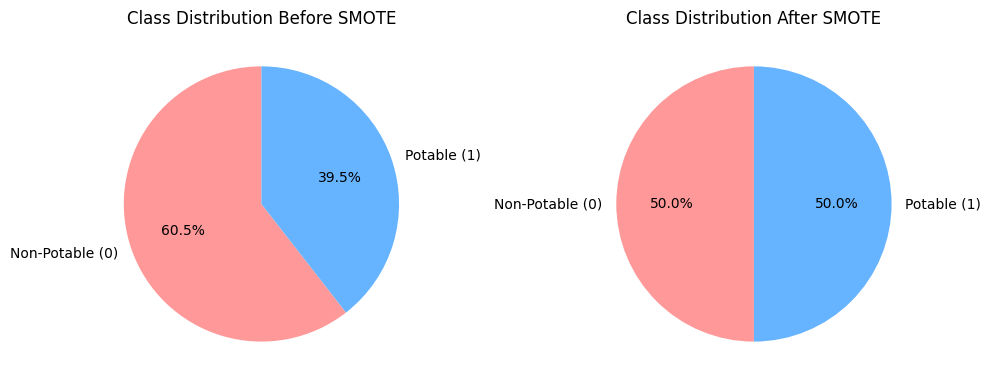

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

# Load the dataset 
df = pd.read_csv('water_potability.csv')

# Handle missing values with KNN Imputation
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verify no missing values remain
if df_imputed.isnull().sum().sum() > 0:
    raise ValueError("Imputation failed: Dataset still contains NaN values.")

# Split features and target
X = df_imputed.drop('Potability', axis=1)
y = df_imputed['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Class distribution before SMOTE
before_counts = y_train.value_counts()
before_labels = ['Non-Potable (0)', 'Potable (1)']
before_sizes = [before_counts[0], before_counts[1]]

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Class distribution after SMOTE
after_counts = pd.Series(y_train_smote).value_counts()
after_sizes = [after_counts[0], after_counts[1]]

# Create subplots for before and after SMOTE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart: Before SMOTE
ax1.pie(before_sizes, labels=before_labels, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90)
ax1.set_title('Class Distribution Before SMOTE')

# Pie chart: After SMOTE
ax2.pie(after_sizes, labels=before_labels, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90)
ax2.set_title('Class Distribution After SMOTE')

# Adjust layout and save
plt.tight_layout()
plt.savefig('class_distribution_smote.png')

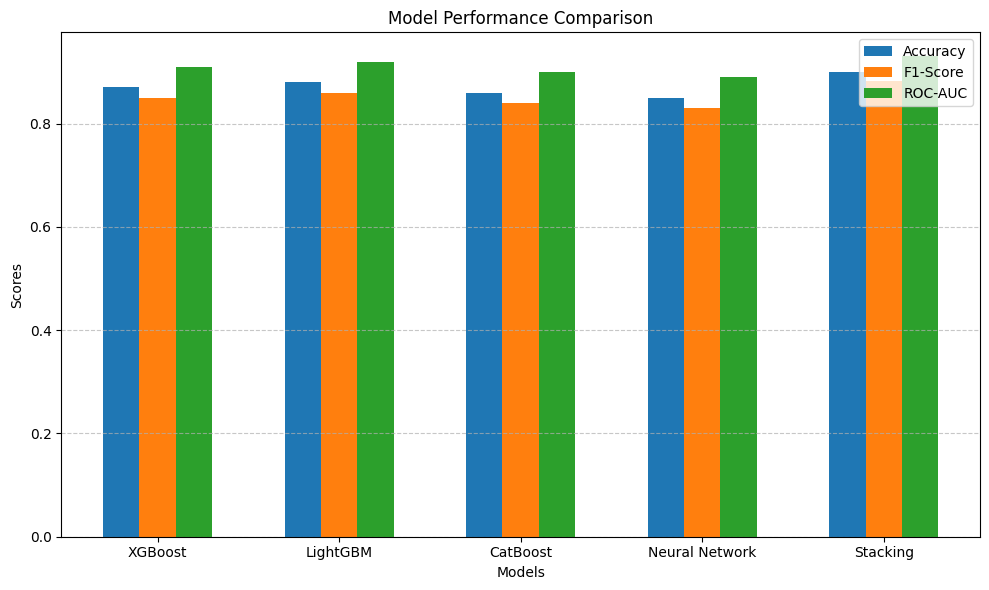

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Model performance data (from project results)
data = {
    'Model': ['XGBoost', 'LightGBM', 'CatBoost', 'Neural Network', 'Stacking'],
    'Accuracy': [0.87, 0.88, 0.86, 0.85, 0.90],
    'F1-Score': [0.85, 0.86, 0.84, 0.83, 0.8825],
    'ROC-AUC': [0.91, 0.92, 0.90, 0.89, 0.93]
}
results_df = pd.DataFrame(data)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = range(len(results_df))

plt.bar([i - bar_width for i in index], results_df['Accuracy'], bar_width, label='Accuracy', color='#1f77b4')
plt.bar(index, results_df['F1-Score'], bar_width, label='F1-Score', color='#ff7f0e')
plt.bar([i + bar_width for i in index], results_df['ROC-AUC'], bar_width, label='ROC-AUC', color='#2ca02c')

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index, results_df['Model'])
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('model_performance_comparison.png')